In [179]:
#Import Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
#Import dataset
dataset= pd.read_csv('Pima_Indians .csv', header= None)

In [181]:
#total rows and columns in dataset
print("shape: ", dataset.shape)
dataset.head()

shape:  (768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,,33,1


In [182]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       768 non-null    int64 
 1   1       768 non-null    object
 2   2       768 non-null    object
 3   3       768 non-null    object
 4   4       768 non-null    object
 5   5       768 non-null    object
 6   6       768 non-null    object
 7   7       768 non-null    object
 8   8       768 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 54.1+ KB


In [183]:
dataset.columns= ['Preganancy', 'Glucose','Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [184]:
dataset.head()

,Preganancy,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,,33,1


In [185]:
#filling blank space with NaN
dataset= dataset.replace(r'^\s*$', np.nan, regex=True)

In [186]:
#Count null values in each columns
dataset.isna().sum()

Preganancy                  0
Glucose                     6
Blood Pressure              2
Skin Thickness              4
Insulin                     8
BMI                         8
DiabetesPedigreeFunction    6
Age                         4
Outcome                     0
dtype: int64

In [187]:
#drop columns with NaN
final_data= dataset.dropna()

In [188]:
#Convert all the columns in float
final_data= final_data.astype('float')

In [189]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Preganancy                731 non-null    float64
 1   Glucose                   731 non-null    float64
 2   Blood Pressure            731 non-null    float64
 3   Skin Thickness            731 non-null    float64
 4   Insulin                   731 non-null    float64
 5   BMI                       731 non-null    float64
 6   DiabetesPedigreeFunction  731 non-null    float64
 7   Age                       731 non-null    float64
 8   Outcome                   731 non-null    float64
dtypes: float64(9)
memory usage: 57.1 KB


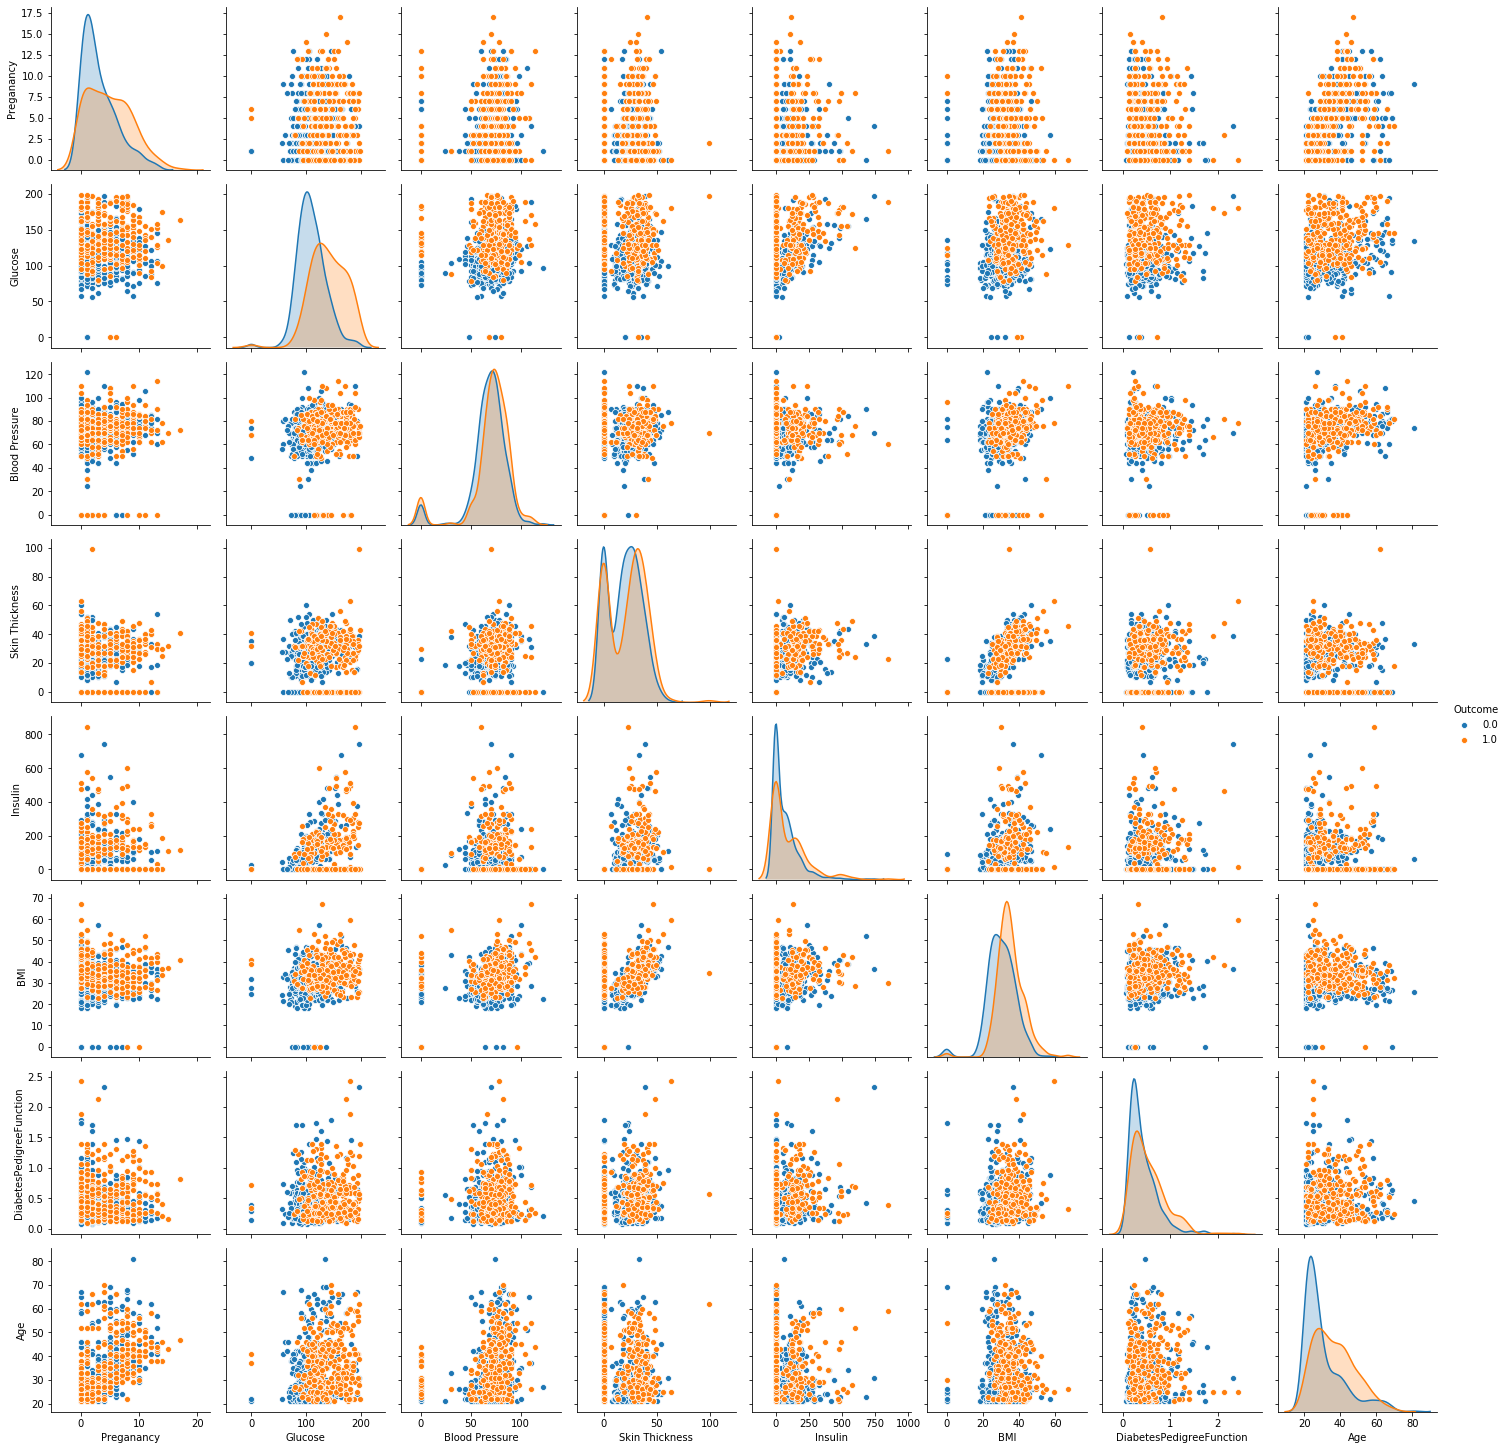

In [178]:
sns.pairplot(final_data, hue= 'Outcome')
plt.show()

In [191]:
x= final_data.drop(columns= ['Outcome'])
y= final_data['Outcome']

In [193]:
from sklearn.model_selection import train_test_split

In [195]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 5)

In [196]:
from sklearn.neighbors import KNeighborsClassifier

In [197]:
classifier= KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [200]:
y_pred= classifier.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.])

In [201]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
matrix=confusion_matrix(y_test, y_pred)
report=classification_report(y_test, y_pred) 
accuracy=accuracy_score(y_test,y_pred)

In [202]:
matrix

array([[87, 21],
       [ 8, 31]], dtype=int64)

In [203]:
accuracy

0.8027210884353742

In [205]:
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       108
         1.0       0.60      0.79      0.68        39

    accuracy                           0.80       147
   macro avg       0.76      0.80      0.77       147
weighted avg       0.83      0.80      0.81       147



In [208]:
#cross validation to ensure our model is correct
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, x, y, cv=5)
cv_scores

array([0.70748299, 0.70547945, 0.71917808, 0.74657534, 0.68493151])

In [209]:
cv_scores.mean()

0.7127294753517847